# Определения состояния глаз человека: открыты или закрыты

**Данные**: временной ряд для нейроинтерфейса.

**Задача**: по измерениям электроэнцефалограммы определить состояние глаз человека.

В этом ноутбуке предложено сравнение качества классификации состояния глаз человека на реальном и синтетическом наборе данных.


*Синтетический набор данных производится путем генерации временного ряда с помощью модели условной генеративно-состязательной сети  (Conditional GAN).*

##Установка и загрузка библиотек

In [ ]:
!pip install tsgm

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.31
    Uninstalling yfinance-0.2.31:
      Successfully uninstalled yfinance-0.2.31


In [ ]:
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
import tsgm

## Чтение данных

In [ ]:
raw_data = loadarff('EEG Eye State.arff')
df = pd.DataFrame(raw_data[0])

In [ ]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [ ]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


In [ ]:
df.eyeDetection.value_counts()

b'0'    8257
b'1'    6723
Name: eyeDetection, dtype: int64

In [ ]:
df.columns

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')

In [ ]:
from matplotlib import pyplot

In [ ]:
closed = df["eyeDetection"].unique()[0]
open = df["eyeDetection"].unique()[1]

In [ ]:
df.replace({closed: 0, open: 1}, inplace=True)

In [ ]:
X = df.drop("eyeDetection", axis = 1)
y = df["eyeDetection"]

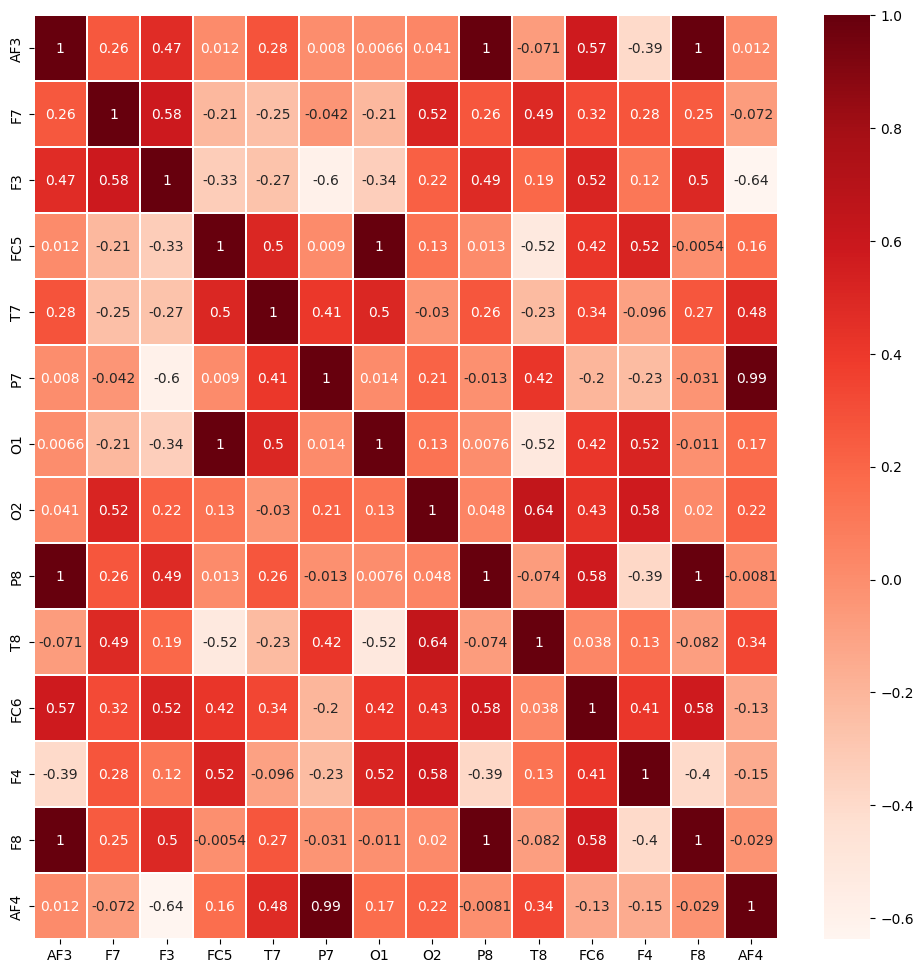

In [ ]:
import seaborn as sns

sns.heatmap(X.corr(), annot=True, cmap="Reds", linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

Processing data

In [ ]:
len(X)/20

749.0

In [ ]:
X.shape

(14980, 14)

In [ ]:
data_processed = np.array(X).reshape(int(len(X)/20), 20, X.shape[1])

In [ ]:
y_processed = np.array(y).reshape(int(len(X)/20), 20)

## Создание синтетических данных

### Предобработка данных

Шкалирование

In [ ]:
scaler = tsgm.utils.TSFeatureWiseScaler((-1, 1))
data_processed = scaler.fit_transform(data_processed)

data_processed = data_processed.astype(np.float32)
y_processed = y_processed.astype(np.float32)

Обучение модели генерации

In [ ]:
batch_size = 128

latent_dim = 6
feature_dim = data_processed.shape[-1]
seq_len = data_processed.shape[1]
output_dim = 1

generator_in_channels = latent_dim + output_dim
discriminator_in_channels = feature_dim + output_dim

In [ ]:
architecture = tsgm.models.architectures.zoo["t-cgan_c4"](
    seq_len=seq_len, feat_dim=feature_dim,
    latent_dim=latent_dim, output_dim=output_dim)
discriminator, generator = architecture.discriminator, architecture.generator


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((data_processed, y_processed))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

In [ ]:
cond_gan = tsgm.models.cgan.ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim,
    temporal=True,
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5),
    loss_fn=keras.losses.MeanSquaredError(),
)

cond_gan.fit(dataset, epochs=500)

In [ ]:
X_gen = cond_gan.generate(y_processed)
X_gen = X_gen.numpy()
y_gen = y

In [ ]:
data = pd.DataFrame(data_processed.reshape(X.shape[0] , X.shape[1]), columns = X.columns.tolist())

In [ ]:
synthetic = pd.DataFrame(X_gen.reshape(X.shape[0] , X.shape[1]), columns = X.columns.tolist())

In [ ]:
synthetic.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,-0.982430,-0.524431,0.106194,-0.999686,0.027013,-0.994381,-0.999485,-0.964988,-0.980786,-0.004208,-0.481987,-0.152167,-0.941773,-0.995604
std,0.008389,0.014173,0.010908,0.000235,0.008299,0.004206,0.000423,0.009450,0.008534,0.009391,0.012108,0.008111,0.007463,0.003957
min,-0.999690,-0.587357,0.074822,-0.999984,0.006243,-0.999850,-0.999950,-0.993507,-0.999615,-0.037177,-0.541926,-0.194011,-0.967784,-0.999873
25%,-0.986525,-0.533684,0.099139,-0.999833,0.021169,-0.997768,-0.999744,-0.970354,-0.986920,-0.010099,-0.489683,-0.157248,-0.946964,-0.998692
50%,-0.980833,-0.524577,0.104980,-0.999738,0.025989,-0.995465,-0.999619,-0.964992,-0.979754,-0.005165,-0.481345,-0.152088,-0.942002,-0.996499
75%,-0.976266,-0.515269,0.111179,-0.999633,0.032152,-0.991550,-0.999414,-0.959313,-0.974130,0.002328,-0.473570,-0.147622,-0.936645,-0.993895
max,-0.965279,-0.470120,0.147455,-0.998436,0.059106,-0.981691,-0.997214,-0.931825,-0.960962,0.024759,-0.443705,-0.114368,-0.918127,-0.977274


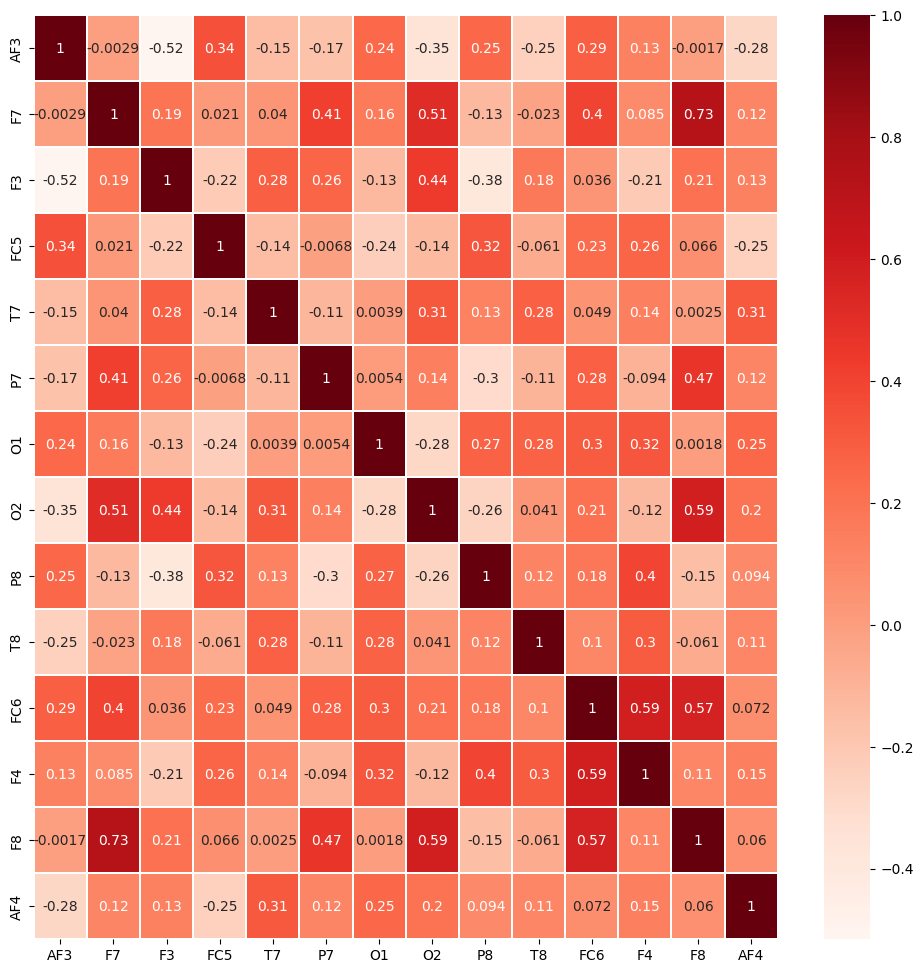

In [ ]:
sns.heatmap(synthetic.corr(), annot=True, cmap="Reds", linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

In [ ]:
y = y.reshape(X.shape[0], 1)

In [ ]:
synthetic.to_csv('EEG.csv')

In [ ]:
np.save( 'y_EEG.npy', y)

In [ ]:
cols = X.columns.tolist()

### Визуализация результатов

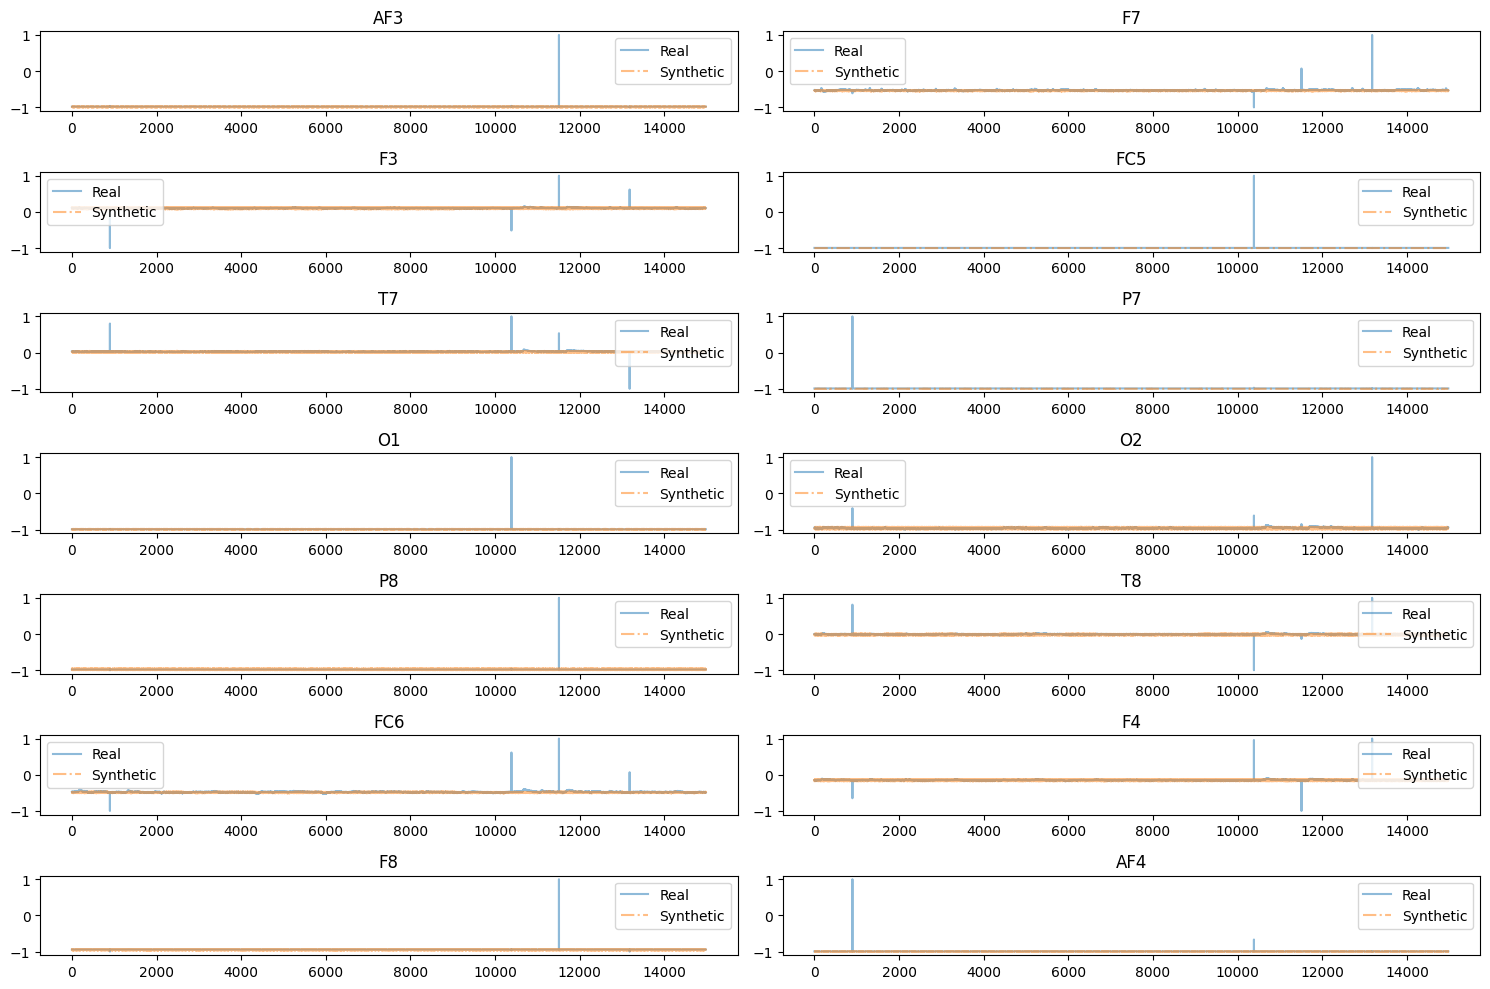

In [ ]:
# Plotting some generated samples. Both Synthetic and Original data are still standartized with values between [0,1]
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 10))
axes=axes.flatten()

for j, col in enumerate(cols):
    df = pd.DataFrame({'Real': data[col],
                   'Synthetic': synthetic[col]})
    df.plot(ax=axes[j],
            title = col,
            secondary_y='Synthetic data', style=['-', '-.'], alpha=0.5)
fig.tight_layout()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sample_size = 250
idx = np.random.permutation(len(data))[:sample_size]

real_sample = np.asarray(synthetic)[idx]
synthetic_sample = np.asarray(synthetic)[idx]

#for the purpose of comparision we need the data to be 2-Dimensional. For that reason we are going to use only two componentes for both the PCA and TSNE.
synth_data_reduced = X_gen.reshape(-1, 20)
stock_data_reduced = np.asarray(X_gen).reshape(-1,20)

n_components = 2
pca = PCA(n_components=n_components)
tsne = TSNE(n_components=n_components, n_iter=300)

#The fit of the methods must be done only using the real sequential data
pca.fit(stock_data_reduced)

pca_real = pd.DataFrame(pca.transform(stock_data_reduced))
pca_synth = pd.DataFrame(pca.transform(synth_data_reduced))

data_reduced = np.concatenate((stock_data_reduced, synth_data_reduced), axis=0)
tsne_results = pd.DataFrame(tsne.fit_transform(data_reduced))

Text(0.5, 0.98, 'Validating synthetic vs real data diversity and distributions')

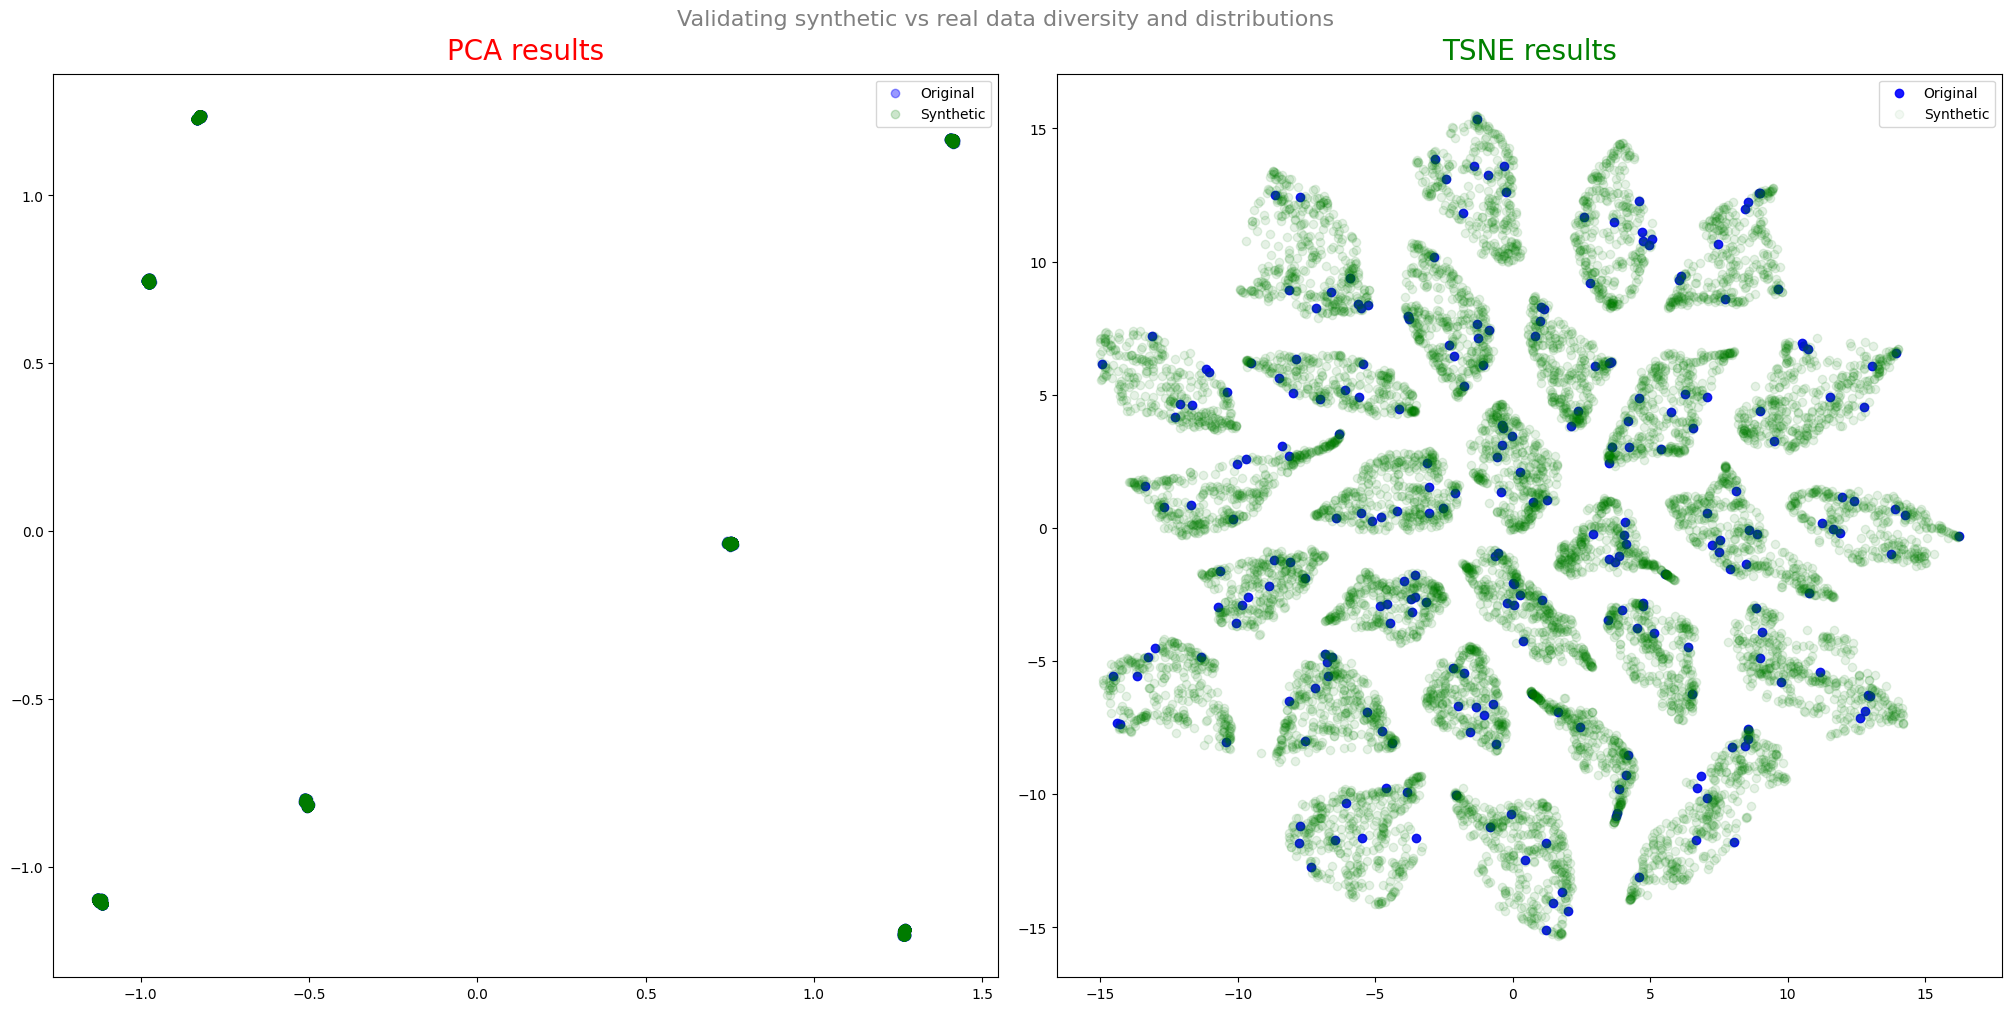

In [ ]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(20,10))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

#TSNE scatter plot
ax = fig.add_subplot(spec[0,0])
ax.set_title('PCA results',
             fontsize=20,
             color='red',
             pad=10)

#PCA scatter plot
plt.scatter(pca_real.iloc[:, 0].values, pca_real.iloc[:,1].values,
            c='blue', alpha=0.4, label='Original')
plt.scatter(pca_synth.iloc[:,0], pca_synth.iloc[:,1],
            c='green', alpha=0.2, label='Synthetic')
ax.legend()

ax2 = fig.add_subplot(spec[0,1])
ax2.set_title('TSNE results',
              fontsize=20,
              color='green',
              pad=10)

plt.scatter(tsne_results.iloc[:sample_size, 0].values, tsne_results.iloc[:sample_size,1].values,
            c='blue', alpha=0.9, label='Original')
plt.scatter(tsne_results.iloc[sample_size:,0], tsne_results.iloc[sample_size:,1],
            c='green', alpha=0.05, label='Synthetic')

ax2.legend()

fig.suptitle('Validating synthetic vs real data diversity and distributions',
             fontsize=16,
             color='grey')

### Оценка близости между реальными и синтетическими данными

In [ ]:
import numpy as np

def calc_euclidean(actual, predic):
    return np.sqrt(np.sum((actual - predic) ** 2))

def calc_mape(actual, predic):
    return np.mean(np.abs((actual - predic) / actual))

In [ ]:
eucl = []
mape = []
for col in data.columns.tolist():
  eucl.append(calc_euclidean(data[col], synthetic[col]))
  mape.append(calc_mape(data[col], synthetic[col]))

In [ ]:
print(np.mean(eucl), np.std(eucl))

2.366682707499438 0.3113262377266265


## Обучение классификатора на реальных и синтетических данных

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#синтетические данные
X_train_gen, X_test_gen, y_train, y_test = train_test_split(synthetic, y, random_state = 44)

In [ ]:
#реальные данные
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state = 44)

### Обучение алгоритма решающего дерева

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#классификатор для обучения на реальных данных
classifier = DecisionTreeClassifier()
cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = cls.predict(X_test)
proba = cls.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, preds)
print(accuracy)
f1 = f1_score(y_test, preds)
print(f1)
precision = precision_score(y_test, preds)
print(precision)
recall = recall_score(y_test, preds)
print(recall)
auc = roc_auc_score(y_test, proba)
print(auc)

0.9279038718291055
0.9191132414619533
0.9365079365079365
0.9023529411764706
0.9814641162088308


In [ ]:
#классификатор для обучения на синтетических данных
cls_synth = DecisionTreeClassifier()
cls_synth.fit(X_train_gen, y_train)

preds_gen = cls_synth.predict(X_test)
proba_gen = cls_synth.predict_proba(X_test)[:, 1]

accuracy_gen = accuracy_score(y_test, preds_gen)
print(accuracy_gen)
f1_gen = f1_score(y_test, preds_gen)
print(f1_gen)
precision_gen = precision_score(y_test, preds_gen)
print(precision_gen)
recall_gen = recall_score(y_test, preds_gen)
print(recall_gen)
auc_gen = roc_auc_score(y_test, proba_gen)
print(auc_gen)

0.5460614152202937
0.46507237256135936
0.5
0.43470588235294116
0.5366683445994536


In [ ]:
metrics = {'data': ['real', 'synthetic'], 'accuracy': [], 'precision': [], 'recall': [], 'F1 score': [], 'RocAuc': []}

In [ ]:
metrics['recall'].append(recall)
metrics['recall'].append(recall_gen)

metrics['precision'].append(precision)
metrics['precision'].append(precision_gen)

metrics['RocAuc'].append(auc)
metrics['RocAuc'].append(auc_gen)

metrics['F1 score'].append(f1)
metrics['F1 score'].append(f1_gen)

metrics['accuracy'].append(accuracy)
metrics['accuracy'].append(accuracy_gen)

In [ ]:
pd.DataFrame(metrics)

,data,accuracy,precision,recall,F1 score,RocAuc
0,real,0.927904,0.936508,0.902353,0.919113,0.981464
1,synthetic,0.546061,0.500000,0.434706,0.465072,0.536668


### Обучение алгоритма XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#классификатор для обучения на синтетических данных
cls_synth = XGBClassifier()

In [ ]:
cls_synth.fit(X_train_gen, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Оценка важности признаков

In [ ]:
print(cls_synth.feature_importances_)

[0.0887538  0.05705921 0.05168152 0.0290211  0.0798764  0.07855676
 0.03815125 0.03848195 0.11242592 0.16284887 0.06098641 0.11367546
 0.02591231 0.06256893]


Text(0.5, 0, 'Xgboost Feature Importance')

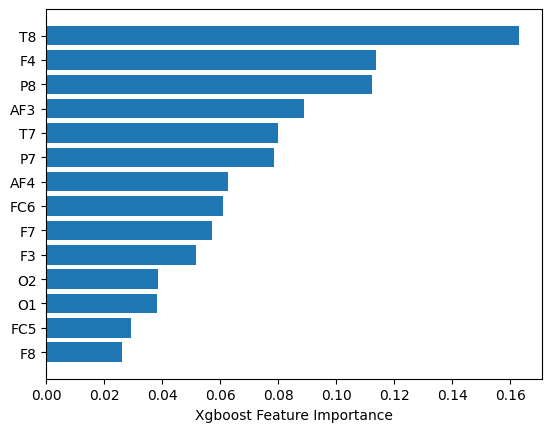

In [ ]:
sorted_idx = cls_synth.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], cls_synth.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

Анализ метрики F score после удаления одного из признаков выборки

In [ ]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Fit model using each importance as a threshold
thresholds = sort(cls_synth.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(cls_synth, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train_gen)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 f1 = f1_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, F1 score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))


Thresh=0.026, n=14, F1 score: 41.33%
Thresh=0.029, n=13, F1 score: 40.71%
Thresh=0.038, n=12, F1 score: 43.34%
Thresh=0.038, n=11, F1 score: 51.56%
Thresh=0.052, n=10, F1 score: 50.30%
Thresh=0.057, n=9, F1 score: 50.87%
Thresh=0.061, n=8, F1 score: 41.68%
Thresh=0.063, n=7, F1 score: 44.42%
Thresh=0.079, n=6, F1 score: 55.74%
Thresh=0.080, n=5, F1 score: 46.38%
Thresh=0.089, n=4, F1 score: 49.68%
Thresh=0.112, n=3, F1 score: 54.28%
Thresh=0.114, n=2, F1 score: 52.12%
Thresh=0.163, n=1, F1 score: 31.29%


Сохранение результатов классификатора, обученного на синтетических данных

In [ ]:
preds_gen = cls_synth.predict(X_test)

In [ ]:
proba_gen = cls_synth.predict_proba(X_test)[:, 1]

In [ ]:
accuracy_gen = accuracy_score(y_test, preds_gen)
print(accuracy_gen)
f1_gen = f1_score(y_test, preds_gen)
print(f1_gen)
precision_gen = precision_score(y_test, preds_gen)
print(precision_gen)

0.5535380507343124
0.41333333333333333
0.5121739130434783


In [ ]:
#классификатор для обучения на реальных данных
cls = XGBClassifier()
cls.fit(X_train, y_train)

In [ ]:
recall_gen = recall_score(y_test, preds_gen)
print(recall_gen)

0.34647058823529414


In [ ]:
auc_gen = roc_auc_score(y_test, proba_gen)
print(auc_gen)

0.5626041996260607


Анализ метрики F score после удаления одного из признаков выборки

In [ ]:
cls = XGBClassifier()

Text(0.5, 0, 'Xgboost Feature Importance for real data')

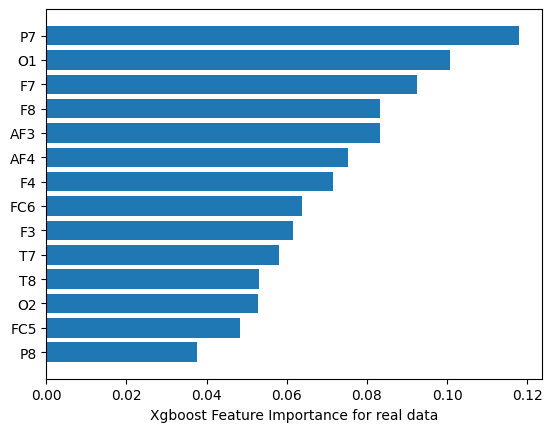

In [ ]:
cls.fit(X_train, y_train)
sorted_idx =  cls.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], cls.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance for real data")

In [ ]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

# Fit model using each importance as a threshold
thresholds = sort(cls.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(cls, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = XGBClassifier()
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 f1 = f1_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, F1 score: %.2f%%" % (thresh, select_X_train.shape[1], f1*100.0))

Thresh=0.038, n=14, F1 score: 91.91%
Thresh=0.048, n=13, F1 score: 91.70%
Thresh=0.053, n=12, F1 score: 90.91%
Thresh=0.053, n=11, F1 score: 90.97%
Thresh=0.058, n=10, F1 score: 90.30%
Thresh=0.062, n=9, F1 score: 89.16%
Thresh=0.064, n=8, F1 score: 88.51%
Thresh=0.072, n=7, F1 score: 86.23%
Thresh=0.075, n=6, F1 score: 83.40%
Thresh=0.083, n=5, F1 score: 81.92%
Thresh=0.083, n=4, F1 score: 76.93%
Thresh=0.093, n=3, F1 score: 67.35%
Thresh=0.101, n=2, F1 score: 60.91%
Thresh=0.118, n=1, F1 score: 49.20%


In [ ]:
preds = cls.predict(X_test)
proba = cls.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, preds)
print(accuracy)
f1 = f1_score(y_test, preds)
print(f1)
precision = precision_score(y_test, preds)
print(precision)
recall = recall_score(y_test, preds)
print(recall)
auc = roc_auc_score(y_test, proba)
print(auc)

0.9279038718291055
0.9191132414619533
0.9365079365079365
0.9023529411764706
0.9814641162088308


Сравнение резальтатов обучения на ситетических и реальных данных. Тестовая выборка в обоих случаях взята из реальных данных.

In [ ]:
metrics = {'data': ['real', 'synthetic'], 'accuracy': [], 'precision': [], 'recall': [], 'F1 score': [], 'RocAuc': []}

In [ ]:
metrics['recall'].append(recall)
metrics['recall'].append(recall_gen)

metrics['precision'].append(precision)
metrics['precision'].append(precision_gen)

metrics['RocAuc'].append(auc)
metrics['RocAuc'].append(auc_gen)

metrics['F1 score'].append(f1)
metrics['F1 score'].append(f1_gen)

In [ ]:
metrics['accuracy'].append(accuracy)
metrics['accuracy'].append(accuracy_gen)

In [ ]:
pd.DataFrame(metrics)

,data,accuracy,precision,recall,F1 score,RocAuc
0,real,0.927904,0.936508,0.902353,0.919113,0.981464
1,synthetic,0.553538,0.512174,0.346471,0.413333,0.562604


In [ ]:
f1 = []
accuracy =[]
precision =[]
recall =[]
roc = []
for col in synthetic.columns.tolist():
  print(col)
  train_data = synthetic.drop([col], axis = 1)
  test_data = X_test.drop([col], axis = 1)
  X_train_gen, X_test_gen, y_train, y_test = train_test_split(train_data, y, random_state = 44)
  cls_synth = XGBClassifier()
  cls_synth.fit(X_train_gen, y_train)
  preds_gen = cls_synth.predict(test_data)
  proba_gen = cls_synth.predict_proba(test_data)[:, 1]
  accuracy_gen = accuracy_score(y_test, preds_gen)
  print(accuracy_gen)
  accuracy.append(accuracy_gen)
  f1_gen = f1_score(y_test, preds_gen)
  print(f1_gen)
  f1.append(f1_gen)
  precision_gen = precision_score(y_test, preds_gen)
  print(precision_gen)
  precision.append(precision_gen)
  recall_gen = recall_score(y_test, preds_gen)
  print(recall_gen)
  recall.append(recall_gen)
  auc_gen = roc_auc_score(y_test, proba_gen)
  print(auc_gen)
  roc.append(auc_gen)

AF3
0.5578104138851803
0.3862120088954781
0.5220440881763527
0.3064705882352941
0.5618210844239897
F7
0.5743658210947931
0.36443381180223283
0.5655940594059405
0.2688235294117647
0.5620755069754062
F3
0.5484646194926569
0.45221898283122774
0.5032444124008651
0.41058823529411764
0.5769372932547101
FC5
0.5465954606141522
0.4332443257676902
0.5007716049382716
0.38176470588235295
0.5606973968071337
T7
0.5572763684913218
0.43796610169491523
0.5168
0.38
0.5747032935423557
P7
0.5607476635514018
0.3836642937429749
0.5283797729618163
0.30117647058823527
0.5560969365741406
O1
0.545260347129506
0.47583871960603263
0.49903163331181405
0.4547058823529412
0.5771471307349345
O2
0.5663551401869159
0.30952380952380953
0.558282208588957
0.21411764705882352
0.5674868402128578
P8
0.5719626168224299
0.35440998791784134
0.561941251596424
0.25882352941176473
0.5645321443981015
T8
0.559679572763685
0.4552362074661381
0.519216277317257
0.4052941176470588
0.549029483676111
FC6
0.5607476635514018
0.4425618434429

In [ ]:
result = pd.DataFrame([synthetic.columns.tolist(),accuracy, precision, recall, f1, roc]).T
result.columns = ['Deleted column', 'accuracy', 'precision', 'recall', 'F1 score', 'RocAuc']
result

,Deleted column,accuracy,precision,recall,F1 score,RocAuc
0,AF3,0.55781,0.522044,0.306471,0.386212,0.561821
1,F7,0.574366,0.565594,0.268824,0.364434,0.562076
2,F3,0.548465,0.503244,0.410588,0.452219,0.576937
3,FC5,0.546595,0.500772,0.381765,0.433244,0.560697
4,T7,0.557276,0.5168,0.38,0.437966,0.574703
5,P7,0.560748,0.52838,0.301176,0.383664,0.556097
6,O1,0.54526,0.499032,0.454706,0.475839,0.577147
7,O2,0.566355,0.558282,0.214118,0.309524,0.567487
8,P8,0.571963,0.561941,0.258824,0.35441,0.564532
9,T8,0.55968,0.519216,0.405294,0.455236,0.549029
